<a href="https://colab.research.google.com/github/01fe21bec205/Python_for_ML/blob/main/10_Multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# question 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/multireg.xlsx')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,sw,16884.92400
1,18,male,33.770,1,no,se,1725.55300
2,28,male,33.000,2,no,se,2229.45556
3,32,female,22.340,3,no,nw,21984.54000
4,50,male,28.340,1,no,nw,3444.54432
5,19,female,30.980,2,yes,nw,10900.34080
6,21,female,31.450,3,yes,ne,2205.40090
7,60,male,36.980,2,no,se,1629.00400
8,18,male,25.080,1,no,sw,2005.09040
9,33,male,29.004,3,yes,nw,29813.00440


In [ ]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55300
2,28,1,33.000,2,0,2,2229.45556
3,32,0,22.340,3,0,1,21984.54000
4,50,1,28.340,1,0,1,3444.54432
5,19,0,30.980,2,1,1,10900.34080
6,21,0,31.450,3,1,0,2205.40090
7,60,1,36.980,2,0,2,1629.00400
8,18,1,25.080,1,0,3,2005.09040
9,33,1,29.004,3,1,1,29813.00440


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
x=df.drop(columns='charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,2,0,2
3,32,0,22.340,3,0,1
4,50,1,28.340,1,0,1
5,19,0,30.980,2,1,1
6,21,0,31.450,3,1,0
7,60,1,36.980,2,0,2
8,18,1,25.080,1,0,3
9,33,1,29.004,3,1,1


In [ ]:
y=df['charges']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
MLR=LinearRegression()

In [ ]:
MLR.fit(x,y)

LinearRegression()

In [ ]:
c=MLR.intercept_
print(c)
m=MLR.coef_
print(m)


22972.425906296477
[  228.62459956  2902.17388475 -1492.20000902  5028.81493683
 14641.68677581  4650.25174188]


In [ ]:
pred=MLR.predict(x)
print(pred)
print(df)

[14276.35504764 -6072.43330098  2391.62163838 16689.36144299
  4695.94819198 10437.50540977 10571.9837996   3768.65278833
 11545.0365193  24517.82584299]
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55300
2   28    1  33.000         2       0       2   2229.45556
3   32    0  22.340         3       0       1  21984.54000
4   50    1  28.340         1       0       1   3444.54432
5   19    0  30.980         2       1       1  10900.34080
6   21    0  31.450         3       1       0   2205.40090
7   60    1  36.980         2       0       2   1629.00400
8   18    1  25.080         1       0       3   2005.09040
9   33    1  29.004         3       1       1  29813.00440


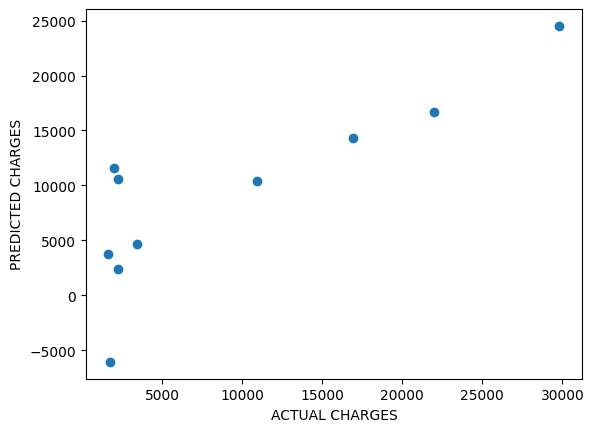

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y,pred)

plt.xlabel("ACTUAL CHARGES")
plt.ylabel("PREDICTED CHARGES")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,pred)

0.6922377347196811

In [ ]:
import numpy as np
mse = np.square(np.subtract(pred,y)).mean()
mse

29108595.862931184

MSE: 29108595.862931184
intercept: 22972.425906296477
slope: [  228.62459956  2902.17388475 -1492.20000902  5028.81493683
 14641.68677581  4650.25174188]


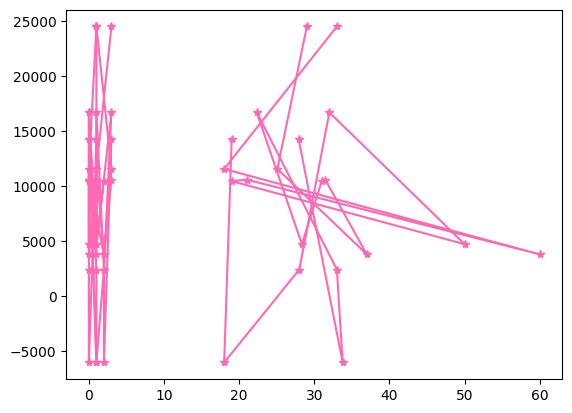

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
mse=mean_squared_error(y,pred)
plt.plot(x,pred,color='HotPink',marker='*')
print("MSE:",mse)
print("intercept:",MLR.intercept_)
print("slope:",MLR.coef_)

# question 2

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/multireg1.xlsx')
df

,x1,x2,x3,x4,y
0,23,45,54,5,321
1,24,3,5,76,111
2,45,213,7,8,234
3,12,3,87,4,986
4,46,56,23,2,4567
5,34,4,5,4,5432
6,34,52,2,54,234
7,56,312,5,543,4343
8,54,5,56,24,2345
9,87,78,87,6,6478


In [ ]:
df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
y     0
dtype: int64

In [ ]:
x=df.drop(columns='y')
x

,x1,x2,x3,x4
0,23,45,54,5
1,24,3,5,76
2,45,213,7,8
3,12,3,87,4
4,46,56,23,2
5,34,4,5,4
6,34,52,2,54
7,56,312,5,543
8,54,5,56,24
9,87,78,87,6


In [ ]:
y=df['y']

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()
MLR.fit(x,y)
c=MLR.intercept_
print(c)
m=MLR.coef_
print(m)

-864.6174895398917
[ 92.7799885  -11.36696974  -0.55017626   5.7018205 ]


In [ ]:
pred=MLR.predict(x)
pred

array([ 756.60819213, 1758.58880168,  931.08076799,  189.58341085,
       2765.46126289, 2264.49064112, 2005.61764713, 3877.90495552,
       4194.70086217, 6306.96345852])

In [ ]:
df

,x1,x2,x3,x4,y
0,23,45,54,5,321
1,24,3,5,76,111
2,45,213,7,8,234
3,12,3,87,4,986
4,46,56,23,2,4567
5,34,4,5,4,5432
6,34,52,2,54,234
7,56,312,5,543,4343
8,54,5,56,24,2345
9,87,78,87,6,6478


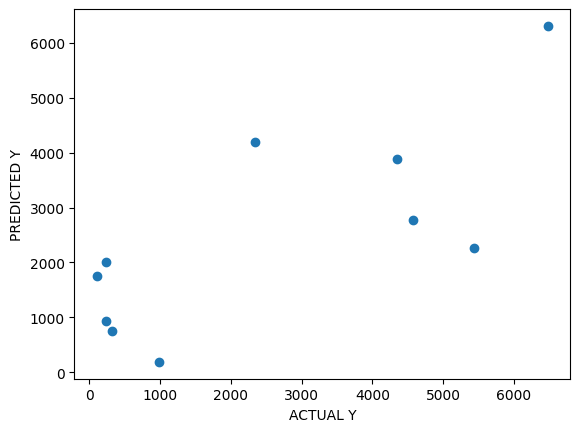

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y,pred)
plt.xlabel("ACTUAL Y")
plt.ylabel("PREDICTED Y")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y,pred)



0.5627012826615332

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y,pred)
mse

2410875.0963053247

In [ ]:
mse=mean_squared_error(y,pred)
mse

2410875.0963053247

MSE: 2410875.0963053247


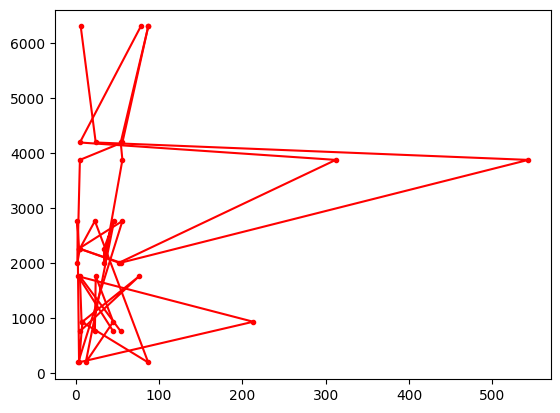

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,pred)
plt.plot(x,pred,color='r',marker=".")
print("MSE:",mse)

# question 3

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
x=df.drop(columns="PE")
print(x)


         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [ ]:
y=df['PE']
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()
MLR.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=MLR.predict(x_train)
print(pred)
print(df)


[464.78586956 448.2500268  448.95561978 ... 463.77782295 469.5866348
 431.26131019]
         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


In [ ]:
MLR.predict([[25.18, 62.96, 1020.04 , 59.08]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444.11308796])

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,pred)
#plt.plot(x,pred,color='HotPink',marker='*')
print("MSE:",mse)
print("intercept:",MLR.intercept_)
print("slope:",MLR.coef_)

MSE: 20.94156361673959
intercept: 448.5613177056888
slope: [-1.96432098 -0.24009895  0.06801034 -0.15645329]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train,pred)

0.9279441090358653

## question 4

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/multireg2.xlsx')
df

,Car,Model,Volume,Weight,CO2
0,Skoda,Citigo,1000,929,95
1,Fiat,500,900,865,90
2,Mini,Cooper,1500,1140,105
3,VW,Up!,1000,929,105
4,Skoda,Fabia,1400,1109,90
5,Mercedes,A-Class,1500,1365,92
6,Ford,Fiesta,1500,1112,98
7,Audi,A1,1600,1150,99


In [ ]:
df['Car']=df['Car'].astype('category')
df['Car']=df['Car'].cat.codes
df['Model']=df['Model'].astype('category')
df['Model']=df['Model'].cat.codes

df

,Car,Model,Volume,Weight,CO2
0,5,3,1000,929,95
1,1,0,900,865,90
2,4,4,1500,1140,105
3,6,7,1000,929,105
4,5,5,1400,1109,90
5,3,1,1500,1365,92
6,2,6,1500,1112,98
7,0,2,1600,1150,99


In [ ]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [ ]:
x=df.drop(columns='CO2')
x

,Car,Model,Volume,Weight
0,5,3,1000,929
1,1,0,900,865
2,4,4,1500,1140
3,6,7,1000,929
4,5,5,1400,1109
5,3,1,1500,1365
6,2,6,1500,1112
7,0,2,1600,1150


In [ ]:
y=df['CO2']

In [ ]:
from sklearn.linear_model import LinearRegression
MLR=LinearRegression()
MLR.fit(x,y)


LinearRegression()

In [ ]:
pred=MLR.predict(x)
print(pred)
print(df)
slack=MLR.predict([[1	,0,	900	,865]])
print(slack)

[ 95.50599891  91.56755358  98.38810592 100.28243511  99.13653754
  91.7020502  100.93328961  96.48402913]
   Car  Model  Volume  Weight  CO2
0    5      3    1000     929   95
1    1      0     900     865   90
2    4      4    1500    1140  105
3    6      7    1000     929  105
4    5      5    1400    1109   90
5    3      1    1500    1365   92
6    2      6    1500    1112   98
7    0      2    1600    1150   99
[91.56755358]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


MSE: 20.89815131232158
intercept: 94.8789456021518
slope: [ 0.09058322  1.17146324  0.0093812  -0.0136937 ]


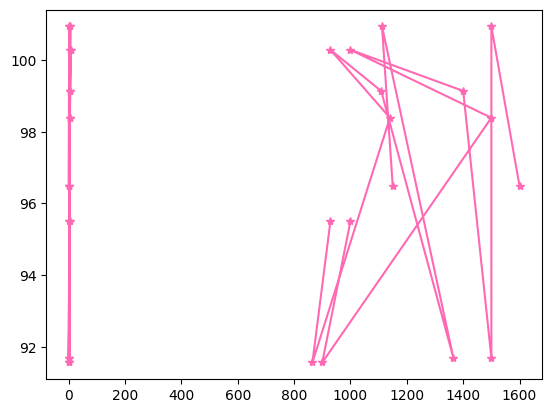

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,pred)
plt.plot(x,pred,color='HotPink',marker='*')
print("MSE:",mse)
print("intercept:",MLR.intercept_)
print("slope:",MLR.coef_)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,pred)

0.35574100000550046